In [95]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [6]:
fake_data_path = 'E:\Fake News Classification\Fake.csv'
fake_data_path = fake_data_path.replace('\\', '/')
fake_data = pd.read_csv(fake_data_path)

In [7]:
true_data_path = 'E:\Fake News Classification\True.csv'
true_data_path = true_data_path.replace('\\', '/')
true_data = pd.read_csv(true_data_path)

In [8]:
fake_data

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [9]:
true_data

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [10]:
fake_data["true"] = 0

In [11]:
fake_data.head(5)

,title,text,subject,date,true
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [12]:
true_data["true"] = 1

In [13]:
true_data.head(5)

,title,text,subject,date,true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [19]:
data = pd.concat([true_data, fake_data])

In [20]:
data = data.sample(frac=1)

In [21]:
data.reset_index(drop=True, inplace=True)

In [22]:
data

,title,text,subject,date,true
0,BLOODY 4TH OF JULY WEEKEND UPDATE: Obama’s Hom...,Just another big city destroyed by Democrats A...,politics,"Jul 5, 2016",0
1,BREAKING: WINNING! SENATE CONFIRMS Senator Jef...,"WITH A VOTE OF 52-47, SENATOR JEFF SESSIONS WA...",politics,"Feb 8, 2017",0
2,"WATCH: ABUSIVE, TRUMP-HATING Student May Be Fa...","On September 27, 2017, an unhinged, liberal, T...",left-news,"Nov 24, 2017",0
3,Queen’s Brian May: We Don’t Want Our Music Us...,There have been many musical artists who have ...,News,"June 9, 2016",0
4,Silicon Valley blasts Senate proposal to tax s...,SAN FRANCISCO (Reuters) - A proposal by the U....,politicsNews,"November 14, 2017",1
...,...,...,...,...,...
44893,"Republican Senator Lee undecided on tax bill, ...",WASHINGTON (Reuters) - U.S. Republican Senator...,politicsNews,"December 14, 2017",1
44894,UK says defense commitment in Nordic and Balti...,LONDON (Reuters) - Britain will pledge on Mond...,worldnews,"September 3, 2017",1
44895,Jared Kushner NEVER Registered To Vote As A “F...,"Meanwhile, as President Trump continues to mee...",politics,"Sep 29, 2017",0
44896,Richard Dreyfuss Just Showed ‘Little-Dick’ Do...,Richard Dreyfuss has provided us with some of ...,News,"May 31, 2016",0


Text(0.5, 1.0, 'subject distibution')

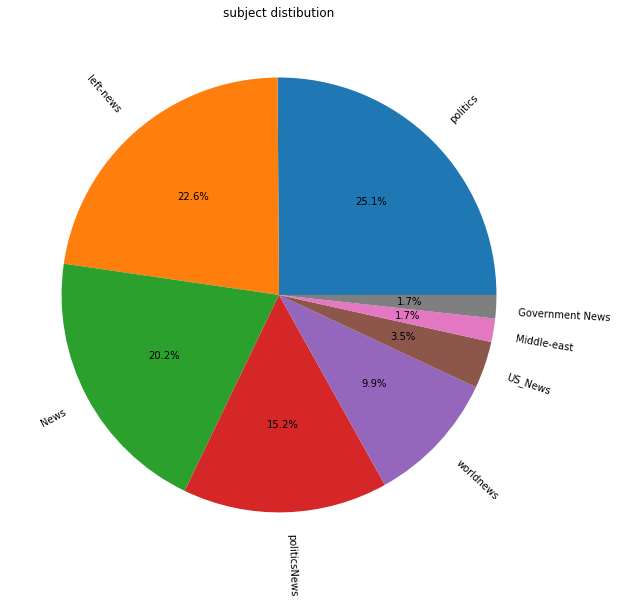

In [23]:
target_counts = data['subject'].value_counts()
target_labels = data['subject'].unique()

fig = plt.figure(figsize=(10,10))

ax = plt.subplot2grid((1,1),(0,0))
plt.pie(target_counts, labels=target_labels, rotatelabels=True, autopct='%1.1f%%')
plt.title('subject distibution')

In [24]:
data = pd.get_dummies(data, columns=["subject"])
data.head()

,title,text,date,true,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
0,BLOODY 4TH OF JULY WEEKEND UPDATE: Obama’s Hom...,Just another big city destroyed by Democrats A...,"Jul 5, 2016",0,0,0,0,0,0,1,0,0
1,BREAKING: WINNING! SENATE CONFIRMS Senator Jef...,"WITH A VOTE OF 52-47, SENATOR JEFF SESSIONS WA...","Feb 8, 2017",0,0,0,0,0,0,1,0,0
2,"WATCH: ABUSIVE, TRUMP-HATING Student May Be Fa...","On September 27, 2017, an unhinged, liberal, T...","Nov 24, 2017",0,0,0,0,0,1,0,0,0
3,Queen’s Brian May: We Don’t Want Our Music Us...,There have been many musical artists who have ...,"June 9, 2016",0,0,0,1,0,0,0,0,0
4,Silicon Valley blasts Senate proposal to tax s...,SAN FRANCISCO (Reuters) - A proposal by the U....,"November 14, 2017",1,0,0,0,0,0,0,1,0


In [ ]:
def preprocess(data):
    pattern = "[^a-zA-Z]"
    lemmatizer = WordNetLemmatizer()
    new = []
    for txt in data:
        txt = txt.lower()
        txt = re.sub(pattern, " ", txt)
        txt = word_tokenize(txt)
        txt = [lemmatizer.lemmatize(word) for word in txt]
        txt = " ".join(txt)
        new.append(txt)
    return new

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

In [44]:
text_new = preprocess(data.text)
text_new[0]

'just another big city destroyed by democrat a the nation took to backyard bbqs and paused to celebrate the birth of our nation the incessant gang warfare in and around the chicago area continued without a hitch with shooting and six death over the three day weekend the tragic toll included the death of a year father and his two young girl in a nearby chicago suburb at least people were shot in the nation s third largest city over the independence day weekend including four people who were fatally wounded the grim violence in chicago which ha recorded homicide already this year continued despite stepped up street patrol by the chicago police department and the arrest of gang member in two of the city s most violent neighborhood ahead of the holiday weekend friday wa atypical in that the shooting were relatively few and no one died but the rest of the weekend more than made up for it friday featured only five citizen wounded all in separate incident saturday rang in with a vengeance wit

In [46]:
title_new = preprocess(data["title"])
title_new[0]

'bloody th of july weekend update obama s hometown of chicago shot killed including yr old father and yr old daughter black reverend caution those who blame gun or cop'

In [74]:
text_vectorizer = CountVectorizer(stop_words="english", max_features = 4000)
title_vectorizer = CountVectorizer(stop_words="english", max_features = 1000)

text_vector = text_vectorizer.fit_transform(text_new).toarray()
title_vector = title_vectorizer.fit_transform(title_new).toarray() 


In [83]:
data.drop(["text","title"],inplace=True, axis=1)

In [85]:
data.drop('date', inplace=True, axis=1)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 9 columns):
true                       44898 non-null int64
subject_Government News    44898 non-null uint8
subject_Middle-east        44898 non-null uint8
subject_News               44898 non-null uint8
subject_US_News            44898 non-null uint8
subject_left-news          44898 non-null uint8
subject_politics           44898 non-null uint8
subject_politicsNews       44898 non-null uint8
subject_worldnews          44898 non-null uint8
dtypes: int64(1), uint8(8)
memory usage: 701.7 KB


In [87]:
y = data['true']

In [90]:
X = np.concatenate((np.array(data.drop("true", axis=1)), title_vector, text_vector), axis=1)

In [91]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
def get_top_n_words(text, n=None) -> list:
    vec = CountVectorizer(stop_words= "english")
    vec.fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [39]:
list_fake = get_top_n_words(fake_data['text'], 25)
list_true = get_top_n_words(true_data['text'], 25)

In [40]:
fake_words = [x[0] for x in list_fake]
num_of_fake_words = [x[1] for x in list_fake]

true_words = [x[0] for x in list_true]
num_of_true_words = [x[1] for x in list_true]

<BarContainer object of 25 artists>

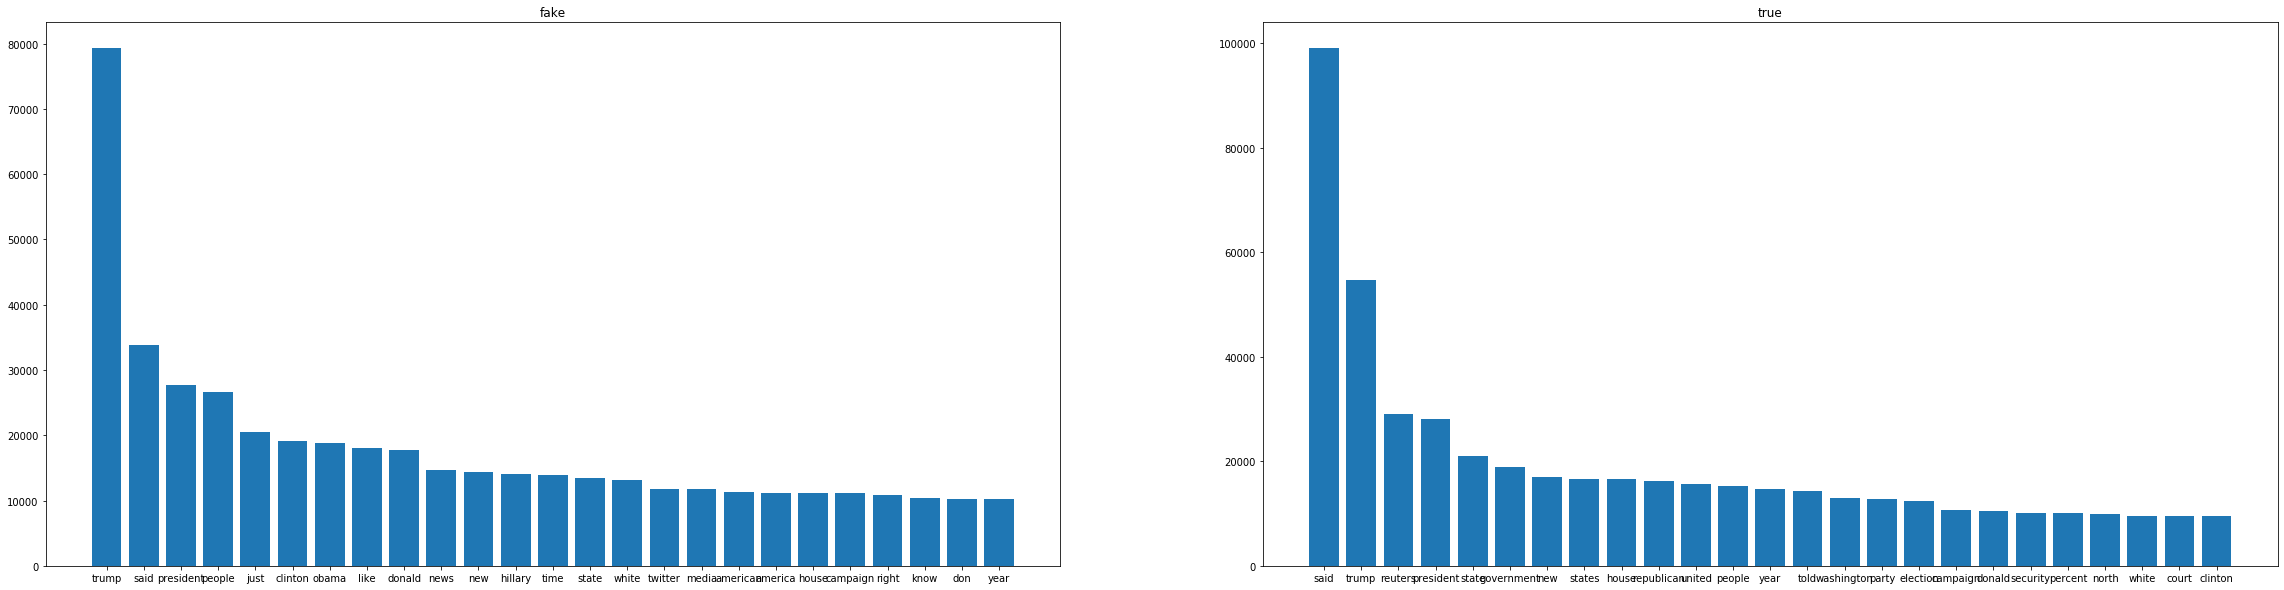

In [42]:
fig = plt.figure(figsize=(40,10))

ax = plt.subplot2grid((1,2),(0,0))
plt.title('fake')
plt.bar(fake_words, num_of_fake_words)


ax = plt.subplot2grid((1,2),(0,1))
plt.title('true')
plt.bar(true_words, num_of_true_words)

In [78]:
target_label = data['true']
data.drop("true", inplace=True, axis=1)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X, np.array(y), test_size=0.3, shuffle=1)

In [93]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31428, 5008)
(13470, 5008)
(31428,)
(13470,)


# Building a model

E:\Python_Distr\Anaconda3\envs\Python_and_machine_learning\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy: 99.903


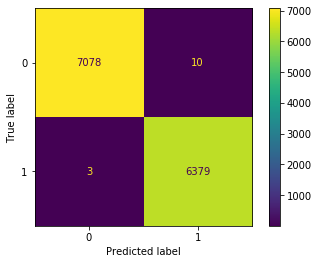

In [102]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

acc_lr = accuracy_score(y_test, pred_lr)
print("accuracy: %0.3f" %(acc_lr*100))

plot_confusion_matrix(model_lr, X_test, y_test)
plt.show()

accuracy: 99.903


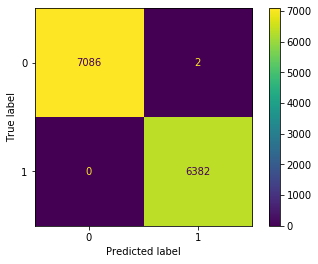

In [106]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
pred_dt = model_dt.predict(X_test)

acc_dt = accuracy_score(y_test, pred_dt)
print("accuracy: %0.3f" %(acc_lr*100))

plot_confusion_matrix(model_dt, X_test, y_test)
plt.show()

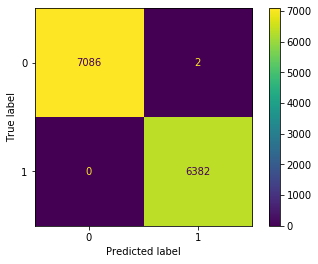

In [109]:
plot_confusion_matrix(model_dt, X_test, y_test, values_format='d')
plt.show()

accuracy: 99.970


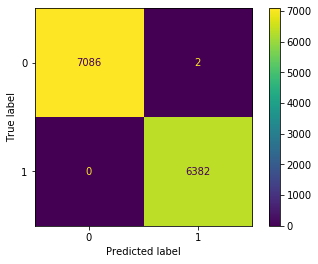

In [110]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)

acc_rf = accuracy_score(y_test, pred_rf)
print("accuracy: %0.3f" %(rf_acc*100))

plot_confusion_matrix(model_rf, X_test, y_test)
plt.show()

accuracy: 96.184


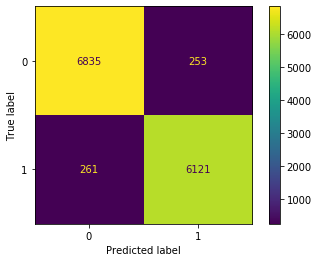

In [111]:
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)
pred_nb = nbc_model.predict(X_test)

acc_nb = accuracy_score(y_test, pred_nb)
print("accuracy: %0.3f" %(nbc_acc*100))

plot_confusion_matrix(model_nb, X_test, y_test)
plt.show()

In [ ]:
class MyNN:
    
    def __init__(self):
        
    def add(self, layers):
        self.layers.append(layer)
    
    def set_loss_func(self, func):
        self.loss = func 
        
    def predict(self, inp_data):
        samples = len(inp_data)
        result = []
        
        for i in range(samples): #foreach
            input_val = inp_data[i]
            
            for layer in self.layers:
                output = layer.forward_prop(input_val)
            result.append(output)
            
        return result
    
    def fit(self, X_train, y_train):
        samples = len(X_train)
        
        #train========
        for epoch in range(epochs):
            err = 0
            
            #forward propagation========
            for i in range(samples):
                output = X_train[i] #zmienić nazwę
                
                for layer in self.layers:
                    output = layer.forward_prop(output)
                
                #loss==========
                err += self.loss(y_train[i], output)
                
                #backward propagation========
                outp_err = self.loss_prime(y_train[i], output)
                for layer in reversed(self.layers):
                    error = layer.bacward_prop(outp_err, learn_rate)
                
                #calc average error
            err /= samples
            print('epoch: {0}   error: {1}'.format(epoch, err))
    